In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [95]:
data_train_path = 'transform_images/train'
data_test_path = 'transform_images/test'
data_val_path = 'transform_images/validation'

In [96]:
img_width = 240
img_height = 240

In [97]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=16,
    validation_split=False)                                                

Found 458 files belonging to 4 classes.


In [98]:
data_cat = data_train.class_names

In [99]:
data_cat

['cool_thermal_images', 'fire_img', 'hot_thermal images', 'short_ciruit_img']

In [100]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=16,
                                                        shuffle=False,
                                                       validation_split=False)

Found 458 files belonging to 4 classes.


In [102]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=16,
    validation_split=False
)

Found 458 files belonging to 4 classes.


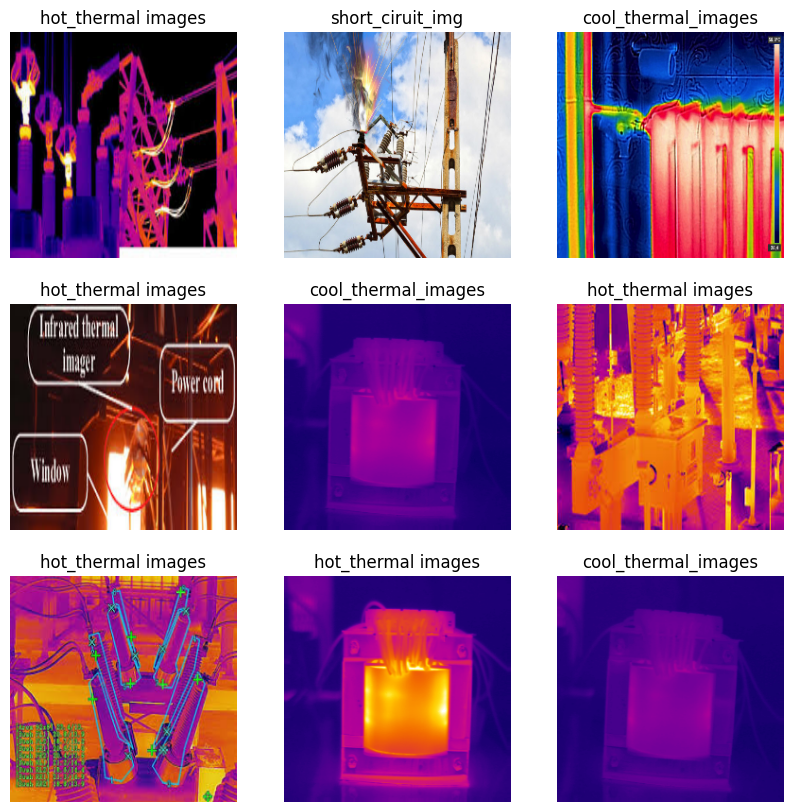

In [103]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [104]:
from tensorflow.keras.models import Sequential

In [105]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 240, 240, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [107]:
from tensorflow.keras import layers, Sequential, regularizers

model = Sequential([
    # Rescaling the pixel values
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # First Convolutional Block
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),  # Normalization
    layers.MaxPooling2D(),
    
    # Second Convolutional Block
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Third Convolutional Block
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Fourth Convolutional Block
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(),
    
    # Flattening for Fully Connected Layers
    layers.Flatten(),
    
    # Dropout Regularization
    layers.Dropout(0.5),
    
    # Fully Connected Layer with Regularization
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    
    # Output Layer (Softmax for multi-class classification)
    layers.Dense(len(data_cat), activation='softmax')
])


In [108]:
import tensorflow as tf

# Compile the model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Use from_logits=True for raw logits output
    metrics=['accuracy']
)
# Define the learning rate schedule
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 10 ** (epoch / 20)  # Adjust learning rate per epoch
)

# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

# Train the model with the callbacks



In [113]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
 2/29 ━━━━━━━━━━━━━━━━━━━━ 16s 611ms/step - accuracy: 1.0000 - loss: 12.7152

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (50,) and (7,)

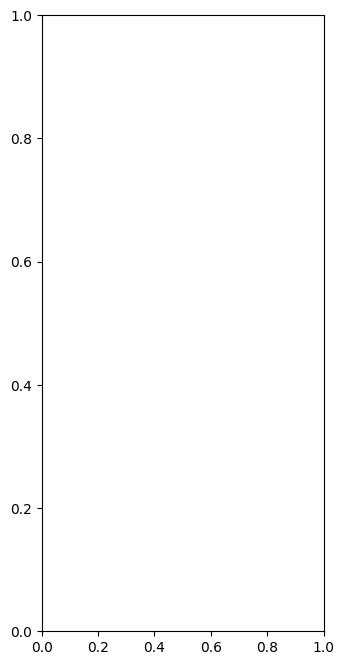

In [112]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')